In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image

In [33]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from nba_api.stats.endpoints.teamplayeronoffsummary import TeamPlayerOnOffSummary

In [3]:
from nba_api.stats.static.teams import get_teams

In [4]:
data_frames = []

for team in get_teams():
    team_id = team['id']
    on_off = TeamPlayerOnOffSummary(team_id=team_id, season='2021-22')
    merged_df = pd.merge(left=on_off.get_data_frames()[1], right=on_off.get_data_frames()[2], on=('TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'VS_PLAYER_ID', 'VS_PLAYER_NAME'), suffixes=('_ON', '_OFF'))
    data_frames.append(merged_df)
    time.sleep(0.15)

In [41]:
total_df = pd.concat(data_frames)

In [42]:
total_df.loc[:, 'MIN_G'] = total_df.MIN_ON / total_df.GP_ON

In [43]:
total_df = total_df.sort_values(by='MIN_G', ascending=False)

In [44]:
total_df = total_df.loc[total_df.GP_ON > 8]

In [45]:
total_df = total_df.iloc[:210]

## Best defenders based on on-off

In [46]:
total_df = total_df.iloc[:150]

In [47]:
total_df.iloc[0]

GROUP_SET_ON            On/Off Court
TEAM_ID                   1610612761
TEAM_ABBREVIATION                TOR
TEAM_NAME            Toronto Raptors
VS_PLAYER_ID                 1627783
VS_PLAYER_NAME        Siakam, Pascal
COURT_STATUS_ON                   On
GP_ON                             66
MIN_ON                          2501
PLUS_MINUS_ON                    4.8
OFF_RATING_ON                  114.1
DEF_RATING_ON                  109.3
NET_RATING_ON                    4.8
GROUP_SET_OFF           On/Off Court
COURT_STATUS_OFF                 Off
GP_OFF                            79
MIN_OFF                         1326
PLUS_MINUS_OFF                  -2.2
OFF_RATING_OFF                 105.7
DEF_RATING_OFF                 108.2
NET_RATING_OFF                  -2.5
MIN_G                        37.8939
Name: 16, dtype: object

In [48]:
plt.style.use('fivethirtyeight')

In [49]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    #print(path)
    return OffsetImage(plt.imread(path), zoom=1.0)

In [50]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter


import matplotlib.ticker as mtick

zoom = 0.65
team_root_dir = '../../team_logos_id/'
player_root_dir = 'player_imgs/'

def get_player_img(player_id, should_download=False, zoom=zoom):
    if should_download:
        url = f"https://cdn.nba.com/headshots/nba/latest/260x190/{player_id}.png"
        response = requests.get(url)
        img = plt.imread(BytesIO(response.content))
    else:
        img = plt.imread(f'{player_root_dir}{player_id}.png')
    #print(path)
    return OffsetImage(img, zoom=zoom)

def get_team_img(team_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

In [51]:
#total_df = total_df.iloc[:50]

In [52]:
total_df.sort_values(by='DEF_RATING_NET', ascending=False)

KeyError: 'DEF_RATING_NET'

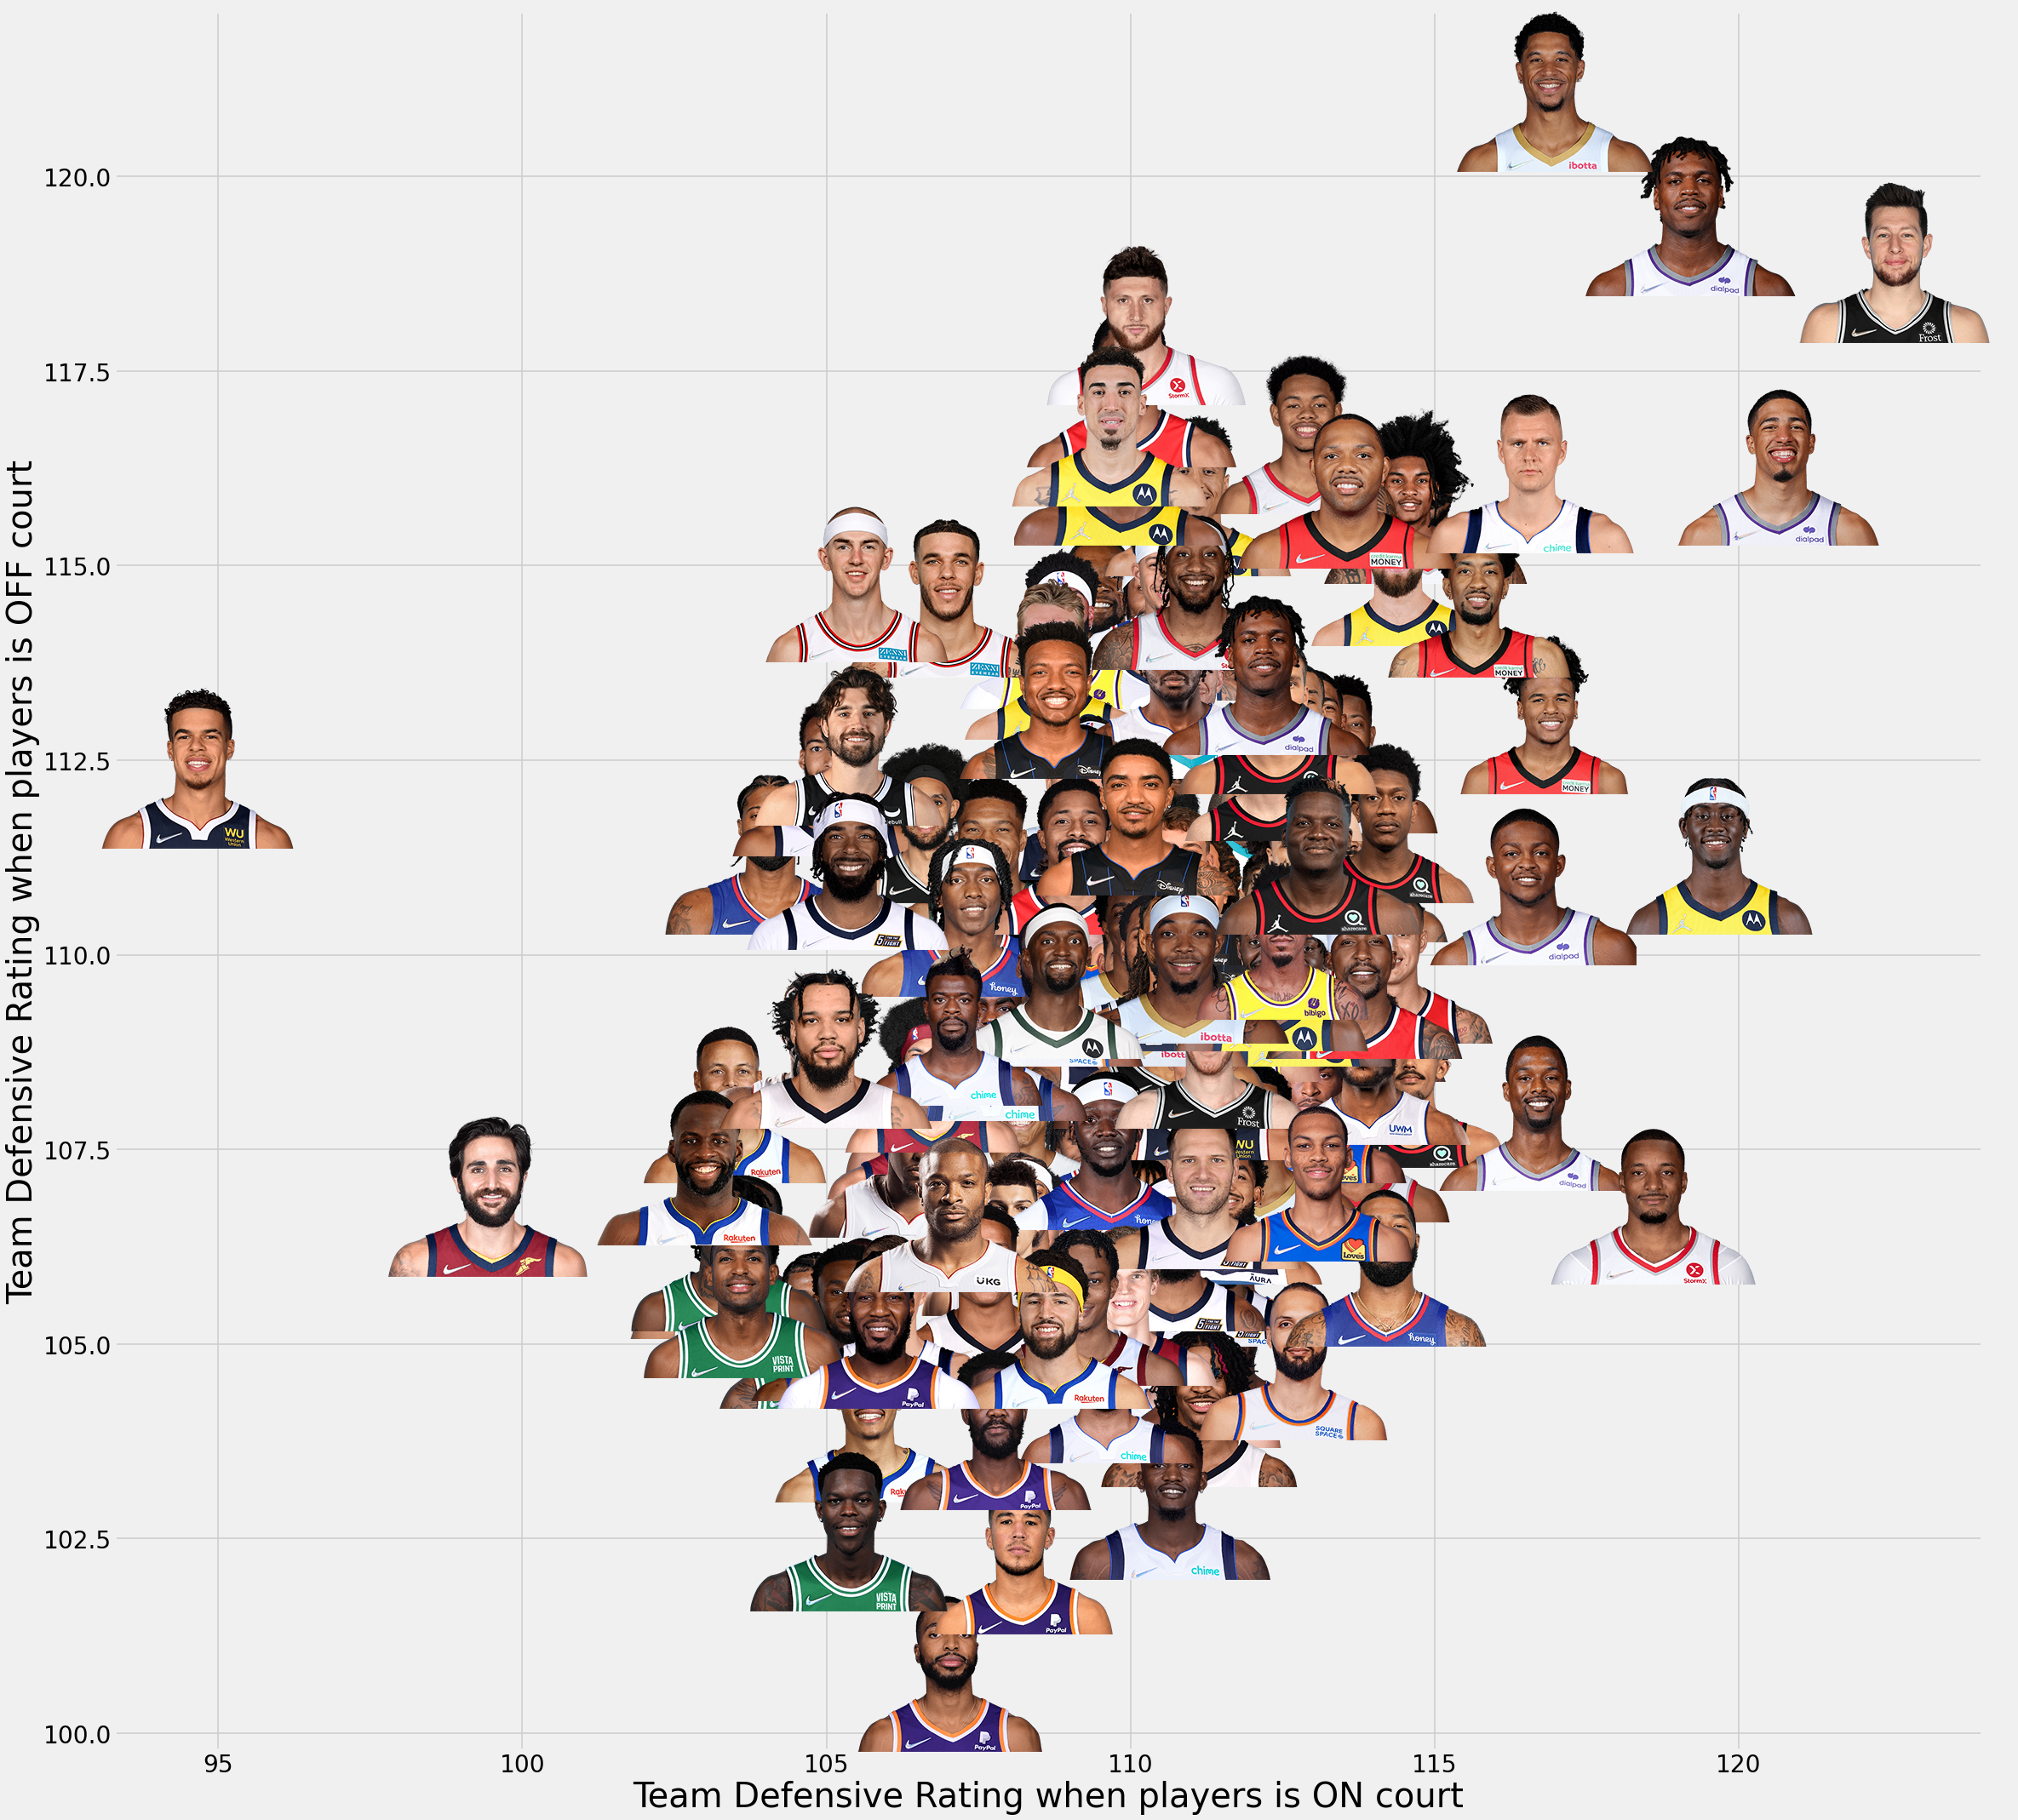

In [53]:
fig, ax = plt.subplots(figsize=(35, 35))

x=total_df.DEF_RATING_ON
y=total_df.DEF_RATING_OFF
ax.scatter(x=x, y=y, s=100)

paths = []
for i in range(len(total_df)):
    item = total_df.iloc[i]
    paths.append(f'player_imgs/{item.VS_PLAYER_ID}.png')

for x0, y0, path in zip(x.tolist(), y.tolist(), paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    

ax.tick_params(labelsize=28)
ax.set_xlabel("Team Defensive Rating when players is ON court", size=40)
ax.set_ylabel("Team Defensive Rating when players is OFF court", size=40)
ax.grid(True, lw=1.5)

In [54]:
total_df.loc[:, 'DEF_RATING_NET'] = total_df.DEF_RATING_ON - total_df.DEF_RATING_OFF

In [56]:
total_df.sort_values(by='DEF_RATING_NET')

GROUP_SET_ON     TEAM_ID TEAM_ABBREVIATION               TEAM_NAME  \
18  On/Off Court  1610612743               DEN          Denver Nuggets   
4   On/Off Court  1610612741               CHI           Chicago Bulls   
17  On/Off Court  1610612757               POR  Portland Trail Blazers   
0   On/Off Court  1610612741               CHI           Chicago Bulls   
19  On/Off Court  1610612739               CLE     Cleveland Cavaliers   
..           ...         ...               ...                     ...   
4   On/Off Court  1610612752               NYK         New York Knicks   
16  On/Off Court  1610612746               LAC             LA Clippers   
9   On/Off Court  1610612739               CLE     Cleveland Cavaliers   
1   On/Off Court  1610612758               SAC        Sacramento Kings   
19  On/Off Court  1610612757               POR  Portland Trail Blazers   

    VS_PLAYER_ID       VS_PLAYER_NAME COURT_STATUS_ON  GP_ON  MIN_ON  \
18       1629008  Porter Jr., Michael              On      9   265.0   
4        1627936         Caruso, Alex              On     41  1147.0   
17        203994        Nurkic, Jusuf              On     56  1578.0   
0        1628366          Ball, Lonzo              On     35  1212.0   
19        201937         Rubio, Ricky              On     34   970.0   
..           ...                  ...             ...    ...     ...   
4         203095       Fournier, Evan              On     78  2298.0   
16        202694   Morris Sr., Marcus              On     53  1540.0   
9        1627747        LeVert, Caris              On     17   504.0   
1         203084     Barnes, Harrison              On     75  2548.0   
19       1626181       Powell, Norman              On     40  1333.0   

    PLUS_MINUS_ON  ...  GROUP_SET_OFF  COURT_STATUS_OFF  GP_OFF MIN_OFF  \
18           10.5  ...   On/Off Court               Off      80  3595.0   
4             4.6  ...   On/Off Court               Off      80  2703.0   
17            0.4  ...   On/Off Court               Off      79  2224.0   
0             3.2  ...   On/Off Court               Off      80  2638.0   
19            9.1  ...   On/Off Court               Off      54  1622.0   
..            ...  ...            ...               ...     ...     ...   
4            -2.4  ...   On/Off Court               Off      80  1562.0   
16           -4.7  ...   On/Off Court               Off      80  2320.0   
9            -7.0  ...   On/Off Court               Off      26   754.0   
1            -7.0  ...   On/Off Court               Off      80  1317.0   
19           -7.5  ...   On/Off Court               Off      52  1168.0   

   PLUS_MINUS_OFF  OFF_RATING_OFF  DEF_RATING_OFF  NET_RATING_OFF      MIN_G  \
18            1.6           114.1           112.4             1.8  29.444444   
4            -2.3           111.9           114.8            -2.9  27.975610   
17          -13.5           105.4           118.1           -12.7  28.178571   
0            -1.8           112.6           114.6            -2.0  34.628571   
19            1.6           108.6           106.9             1.7  28.529412   
..            ...             ...             ...             ...        ...   
4             2.2           106.6           104.8             1.8  29.461538   
16            1.8           107.7           106.0             1.6  29.056604   
9             0.2           111.2           111.3            -0.1  29.647059   
1            -2.3           105.4           108.0            -2.6  33.973333   
19            0.0           107.0           106.8             0.1  33.325000   

    DEF_RATING_NET  
18           -17.7  
4             -9.3  
17            -8.0  
0             -7.6  
19            -7.4  
..             ...  
4              8.0  
16             8.2  
9              8.3  
1              8.7  
19            11.8  

[150 rows x 23 columns]

In [63]:
total_df.loc[total_df.TEAM_ABBREVIATION == 'BOS'].sort_values(by='DEF_RATING_NET')

GROUP_SET_ON     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME  VS_PLAYER_ID  \
25  On/Off Court  1610612738               BOS  Boston Celtics       1629057   
21  On/Off Court  1610612738               BOS  Boston Celtics       1628369   
0   On/Off Court  1610612738               BOS  Boston Celtics       1627759   
6   On/Off Court  1610612738               BOS  Boston Celtics        201143   
19  On/Off Court  1610612738               BOS  Boston Celtics        203935   
18  On/Off Court  1610612738               BOS  Boston Celtics        203471   

          VS_PLAYER_NAME COURT_STATUS_ON  GP_ON  MIN_ON  PLUS_MINUS_ON  ...  \
25  Williams III, Robert              On     61  1804.0            9.8  ...   
21         Tatum, Jayson              On     75  2705.0           11.3  ...   
0          Brown, Jaylen              On     64  2160.0            9.8  ...   
6            Horford, Al              On     68  1981.0            9.0  ...   
19         Smart, Marcus              On     69  2240.0            9.2  ...   
18      Schroder, Dennis              On     49  1433.0            2.3  ...   

    GROUP_SET_OFF  COURT_STATUS_OFF  GP_OFF MIN_OFF PLUS_MINUS_OFF  \
25   On/Off Court               Off      80  2081.0            4.7   
21   On/Off Court               Off      80  1180.0           -2.6   
0    On/Off Court               Off      80  1725.0            3.8   
6    On/Off Court               Off      80  1904.0            5.1   
19   On/Off Court               Off      80  1645.0            4.2   
18   On/Off Court               Off      56  1295.0            7.2   

    OFF_RATING_OFF  DEF_RATING_OFF  NET_RATING_OFF      MIN_G  DEF_RATING_NET  
25           111.3           106.2             5.1  29.573770            -2.8  
21           104.3           106.1            -1.8  36.066667            -2.6  
0            110.4           106.2             4.2  33.750000            -2.5  
6            110.7           105.6             5.1  29.132353            -2.0  
19           109.9           105.2             4.7  32.463768            -0.4  
18           109.8           102.6             7.2  29.244898             2.8  

[6 rows x 23 columns]

## Net Rating

In [18]:
total_df = total_df.loc[total_df.GP_ON > 40]

In [19]:
total_df = total_df.loc[total_df.MIN_G > 20]

In [64]:
total_df

GROUP_SET_ON     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
16  On/Off Court  1610612761               TOR        Toronto Raptors   
18  On/Off Court  1610612761               TOR        Toronto Raptors   
7   On/Off Court  1610612755               PHI     Philadelphia 76ers   
18  On/Off Court  1610612751               BKN          Brooklyn Nets   
14  On/Off Court  1610612747               LAL     Los Angeles Lakers   
..           ...         ...               ...                    ...   
19  On/Off Court  1610612748               MIA             Miami Heat   
0   On/Off Court  1610612760               OKC  Oklahoma City Thunder   
19  On/Off Court  1610612747               LAL     Los Angeles Lakers   
4   On/Off Court  1610612763               MEM      Memphis Grizzlies   
3   On/Off Court  1610612737               ATL          Atlanta Hawks   

    VS_PLAYER_ID  VS_PLAYER_NAME COURT_STATUS_ON  GP_ON  MIN_ON  \
16       1627783  Siakam, Pascal              On     66  2501.0   
18       1627832  VanVleet, Fred              On     65  2462.0   
7         201935   Harden, James              On     19   714.0   
18        202681   Irving, Kyrie              On     27  1012.0   
14          2544   James, LeBron              On     56  2084.0   
..           ...             ...             ...    ...     ...   
19        200782    Tucker, P.J.              On     71  1981.0   
0        1629647  Bazley, Darius              On     69  1924.0   
19       1628370     Monk, Malik              On     73  2032.0   
4        1628415  Brooks, Dillon              On     30   835.0   
3         203991   Capela, Clint              On     72  1991.0   

    PLUS_MINUS_ON  ...  GROUP_SET_OFF  COURT_STATUS_OFF  GP_OFF MIN_OFF  \
16            4.8  ...   On/Off Court               Off      79  1326.0   
18            4.1  ...   On/Off Court               Off      79  1365.0   
7             8.8  ...   On/Off Court               Off      25   491.0   
18            5.1  ...   On/Off Court               Off      80  2843.0   
14           -2.7  ...   On/Off Court               Off      79  1763.0   
..            ...  ...            ...               ...     ...     ...   
19            5.6  ...   On/Off Court               Off      80  1894.0   
0           -11.8  ...   On/Off Court               Off      80  1941.0   
19            1.2  ...   On/Off Court               Off      79  1815.0   
4            11.7  ...   On/Off Court               Off      79  2977.0   
3             2.8  ...   On/Off Court               Off      80  1854.0   

   PLUS_MINUS_OFF  OFF_RATING_OFF  DEF_RATING_OFF  NET_RATING_OFF      MIN_G  \
16           -2.2           105.7           108.2            -2.5  37.893939   
18           -0.7           109.2           110.1            -0.8  37.876923   
7            -4.8           106.1           111.8            -5.6  37.578947   
18           -1.0           110.1           111.2            -1.1  37.481481   
14           -3.8           105.2           109.4            -4.2  37.214286   
..            ...             ...             ...             ...        ...   
19            3.7           110.5           106.7             3.8  27.901408   
0            -3.0           104.2           107.1            -2.9  27.884058   
19           -8.2           103.2           110.2            -7.0  27.835616   
4             4.5           112.9           108.8             4.1  27.833333   
3             0.0           110.9           111.3            -0.4  27.652778   

    DEF_RATING_NET  
16             1.1  
18            -1.6  
7             -1.3  
18             2.4  
14             4.1  
..             ...  
19             0.4  
0              6.0  
19             2.3  
4             -3.8  
3              1.8  

[150 rows x 23 columns]

In [65]:
total_df.loc[:, 'NET_RATING_DIFF'] = total_df.NET_RATING_ON - total_df.NET_RATING_OFF

In [67]:
total_df.loc[total_df.GP_ON > 40].sort_values(by='NET_RATING_DIFF', ascending=False)

GROUP_SET_ON     TEAM_ID TEAM_ABBREVIATION               TEAM_NAME  \
14  On/Off Court  1610612743               DEN          Denver Nuggets   
2   On/Off Court  1610612744               GSW   Golden State Warriors   
21  On/Off Court  1610612738               BOS          Boston Celtics   
17  On/Off Court  1610612757               POR  Portland Trail Blazers   
9   On/Off Court  1610612751               BKN           Brooklyn Nets   
..           ...         ...               ...                     ...   
17  On/Off Court  1610612764               WAS      Washington Wizards   
16  On/Off Court  1610612746               LAC             LA Clippers   
6   On/Off Court  1610612745               HOU         Houston Rockets   
0   On/Off Court  1610612760               OKC   Oklahoma City Thunder   
14  On/Off Court  1610612752               NYK         New York Knicks   

    VS_PLAYER_ID      VS_PLAYER_NAME COURT_STATUS_ON  GP_ON  MIN_ON  \
14        203999       Jokic, Nikola              On     73  2440.0   
2         201939      Curry, Stephen              On     64  2211.0   
21       1628369       Tatum, Jayson              On     75  2705.0   
17        203994       Nurkic, Jusuf              On     56  1578.0   
9         201142       Durant, Kevin              On     53  1966.0   
..           ...                 ...             ...    ...     ...   
17       1628398         Kuzma, Kyle              On     66  2204.0   
16        202694  Morris Sr., Marcus              On     53  1540.0   
6        1630224        Green, Jalen              On     65  2062.0   
0        1629647      Bazley, Darius              On     69  1924.0   
14        203944      Randle, Julius              On     72  2544.0   

    PLUS_MINUS_ON  ...  COURT_STATUS_OFF  GP_OFF  MIN_OFF PLUS_MINUS_OFF  \
14            8.0  ...               Off      80   1420.0           -7.6   
2            11.0  ...               Off      79   1591.0           -3.0   
21           11.3  ...               Off      80   1180.0           -2.6   
17            0.4  ...               Off      79   2224.0          -13.5   
9             5.9  ...               Off      80   1889.0           -5.0   
..            ...  ...               ...     ...      ...            ...   
17           -6.1  ...               Off      80   1666.0            1.2   
16           -4.7  ...               Off      80   2320.0            1.8   
6           -12.2  ...               Off      80   1793.0           -4.1   
0           -11.8  ...               Off      80   1941.0           -3.0   
14           -3.1  ...               Off      80   1316.0            4.4   

   OFF_RATING_OFF  DEF_RATING_OFF  NET_RATING_OFF      MIN_G  DEF_RATING_NET  \
14          104.7           112.0            -7.3  33.424658            -2.8   
2           105.2           108.1            -2.9  34.546875            -4.7   
21          104.3           106.1            -1.8  36.066667            -2.6   
17          105.4           118.1           -12.7  28.178571            -8.0   
9           109.0           114.4            -5.4  37.094340            -4.9   
..            ...             ...             ...        ...             ...   
17          110.4           109.9             0.5  33.393939             4.4   
16          107.7           106.0             1.6  29.056604             8.2   
6           109.0           113.1            -4.1  31.723077             3.8   
0           104.2           107.1            -2.9  27.884058             6.0   
14          110.3           104.9             5.4  35.333333             6.7   

    NET_RATING_DIFF  
14             15.1  
2              13.6  
21             13.5  
17             12.6  
9              11.5  
..              ...  
17             -6.6  
16             -6.8  
6              -7.6  
0              -8.4  
14             -9.0  

[122 rows x 24 columns]

Text(0, 0.5, 'Team Net Rating when player is OFF court')

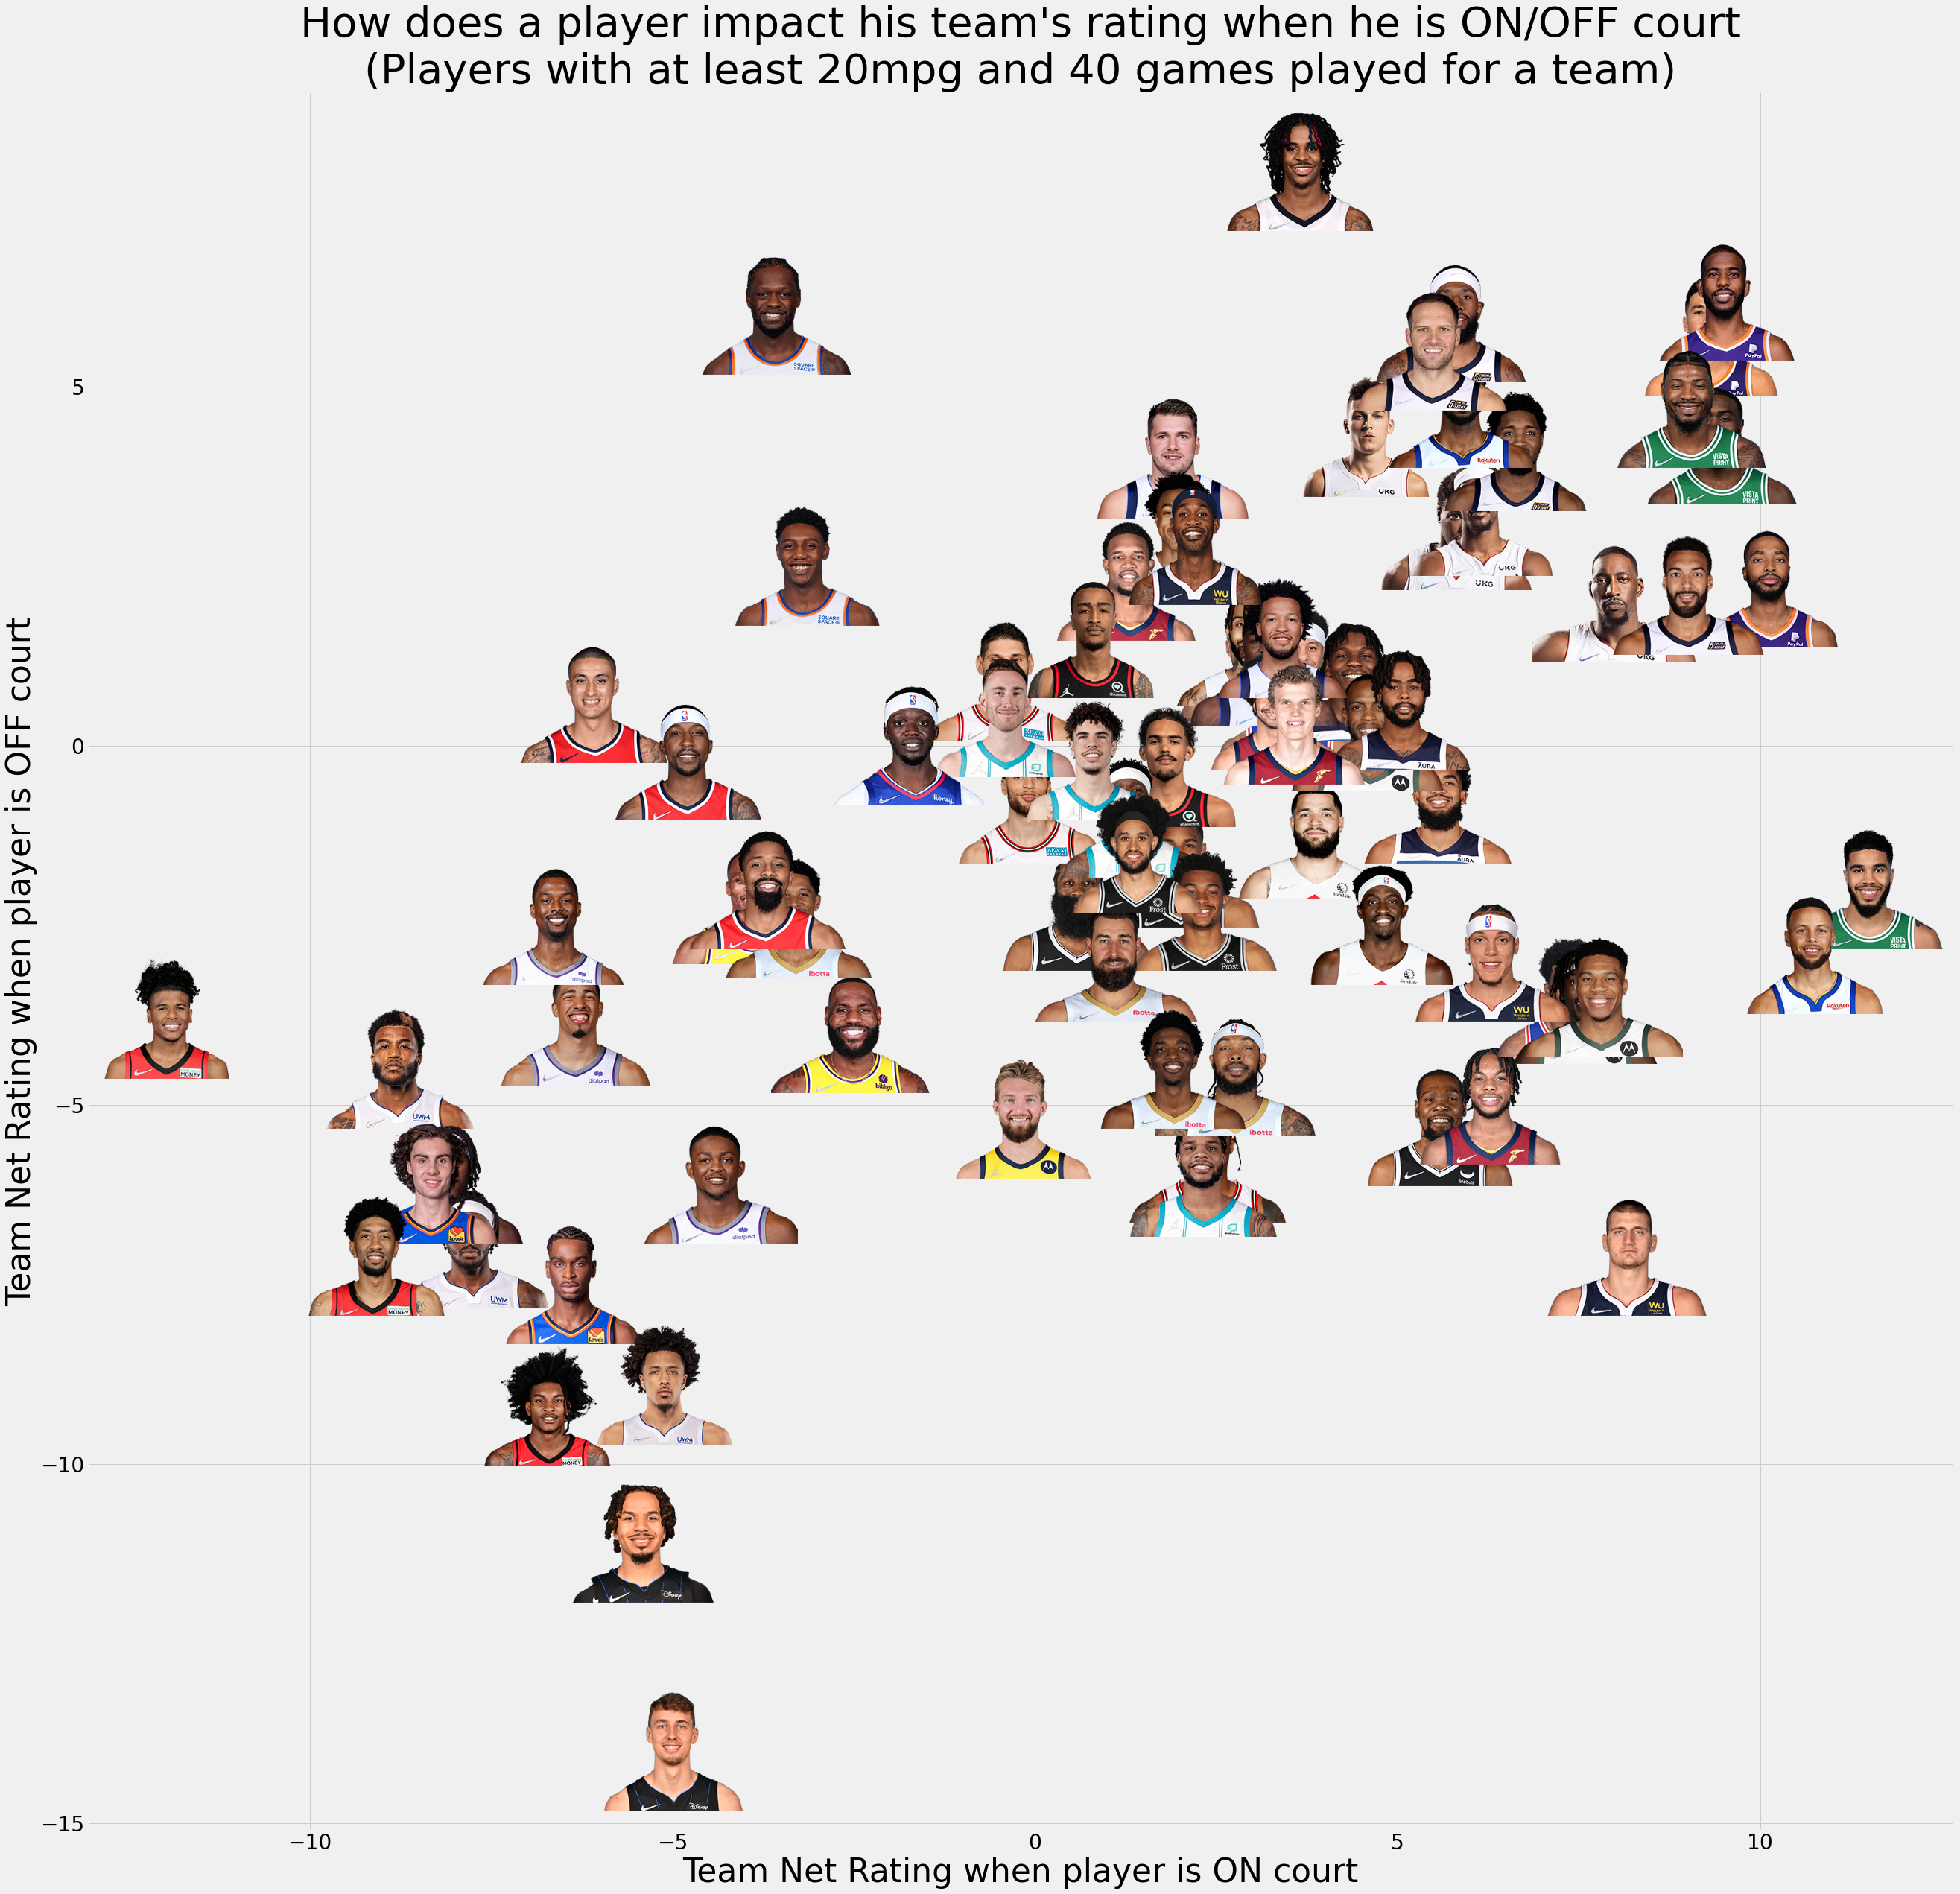

In [23]:
fig, ax = plt.subplots(figsize=(40, 40))


ax.scatter(total_df.NET_RATING_ON, y=total_df.NET_RATING_OFF, s=10)


for i in range(len(total_df)):
    item = total_df.iloc[i]

    ab = AnnotationBbox(get_player_img(item.VS_PLAYER_ID), (item.NET_RATING_ON, item.NET_RATING_OFF), frameon=False)
    ax.add_artist(ab)
    

ax.tick_params(labelsize=28)
ax.set_title("How does a player impact his team's rating when he is ON/OFF court\n(Players with at least 20mpg and 40 games played for a team)", size=56)
ax.set_xlabel("Team Net Rating when player is ON court", size=44)
ax.set_ylabel("Team Net Rating when player is OFF court", size=44)
#ax.grid()